<a href="https://colab.research.google.com/github/rachanrv/Emotion-Recognition-Project/blob/main/Emotion_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

One of the hardest problems to solve in deep learning has nothing to do with neural nets, it's the problem of getting the right data in the right format. 

The goal of our project is to develop and implement a model that evaluates the daily mood of the employees' at the workplace. Using facial recognition models, a public or private company or institution  can predict the majority of employees' mood cycle (productive or unproductive) throughout a week. Hence, employer can organize productivity boosting activities and assign task(s) to  uplift employees’ morale and spirit. Basically, the specialy trained and licensed counselors will recommend activities that are approved by federal and state authorities and will compliant. These activities will aid in boosting the overall performance.

The following are our facial expressions we considered:
1. Happy
2. Sad
3. Angry
4. Normal
5. Disgust  
This is a binary classfication model with productive or unproductive as outputs.

**Motivation**

Emotion is triggered by specific situations, and the recognition of human emotion is a crucial topic
in the study of human-computer interfaces (HCIs) to empathize with people $^{1–2}$. When a machine
communicates with people, emotion detection can give people more affinities and help to provide
personalized service to people depending on their moods, which inspires confidence in people.

Many countries have strong regulations for users who work at critical positions.Th­ey regularly need to take Neurophysical Testing (NPT) to ensure mental health is good to avoid risks depending on stress.

Based our personal experiences, we noticed a certain of group employees  might be unproductive due to personal, family, work or other issues of problems. Hence, we are attempting to resolve this issue/problem with use of the convolution neural network(CNN). CNN are a class of machine
learning architecture that perform especially well at learning complex target function.

We understand we have to very careful in handling emotions related models due to any violation of the Labor Act and American with Disabilities Act (1990). Prior to the implementation the various activities we have to ensure that we consult professional and licensed counselors and Human Resources professional wiithin the organization. To ensure adherences to Labor Act and ADA. we have to  provide adequate accomodations to any employee subjected to both laws and have to complaint

# **2. Literature Review**

According to CNBC $^{7}$,the Labor Department said that the working hours worked fell by 42.9%, contributing to a 37.1% decline in output during COVID.

Referring to an article  on Productivity Measurement in US$^{8}$, the new issue had several ways to bring a productive environment in companies and high schools during COVID.This project is our small scale attempt and motivitation to contribute to the effort to increase productivity in companies.It focuses on every employee individually to encourage them according to the result rather then classify the productivity.

According to another article on CNN Models for Classifying Emotions evoked by Paintings$^{1}$,the approach mentioned was used to classify images in this project.Articles were referred to increase the efficiency of classification$^{9}$,different approach to solve the project$^{2,5,6,10-11}$ and useful devices statistics for the model efficiency$^{12}$.

Finaly, the article on tensorflow$^{6}$ states that CNNs have managed to achieve and demonstrate superhuman performance on some complex visual tasks: image search services, self-driving cars, automatic video classification systems, and more. Morevover, CNNs are not restricted to visuaal perception: they are succesful at other tasks, such vocie recongnition and NLP.

# **3. URL for dataset**

A combination of following datasets were used for processing our models:
* https://www.face-rec.org/databases/   
* http://vision.ucsd.edu/content/yale-face-database   
* https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

# **4. Data Gathering and Description**

We had collected the data from the above-mentioned websites and we had categorized the input facial emotions into two groups: **Productive and Unproductive**. 
A productive group includes facial expressions such as normal face, happy, surprised and smiling face. While an unproductive group includes facial expressions such as angry, sad, disgust, frowning etc.
We had paritioned with $4000 $ images for Trained dataset that consists of a  mixture of emotions.
Whereas for  Validation partition, we collect $2000$ images. The following is the breakdown of the respective partitions:

Trained : $4000$ images   
Validation : $2000 $images   
   

#**5. Basic Neural Network**
 

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = "/content/drive/Shared drives/OPIM-5509-Introduction to Deep Learning/Project 2/data/New_data/" # make sure it has the slash / on the end! paste statement won't work otherwise!

train_dir = path + "train"
validation_dir = path + "validation"
#test_dir = path + "test"

In [ ]:
train_dir

'/content/drive/Shared drives/OPIM-5509-Introduction to Deep Learning/Project 2/data/New_data/train'

## 5.1 Building our network

 We will use the same 
general structure: our convnet will be a stack of alternated `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one 
more `Conv2D` + `MaxPooling2D` stage. This serves both to augment the capacity of the network, and to further reduce the size of the 
feature maps, so that they aren't overly large when we reach the `Flatten` layer. Here, since we start from inputs of size 150x150 (a 
somewhat arbitrary choice), we end up with feature maps of size 2x2 right before the `Flatten` layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 216), while the size of the feature maps is 
decreasing (from 148x148 to 2x2). This is a pattern that you will see in almost all convnets.

Since we are attacking a binary classification problem, we are ending the network with a single unit (a `Dense` layer of size 1) and a 
`sigmoid` activation. This unit will encode the probability that the network is looking at one class or the other.

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(216, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

For our compilation step, we'll go with the `Adam` optimizer as usual. Since we ended our network with a single sigmoid unit, we will 
use binary crossentropy as our loss.

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

## 5.2 Data preprocessing

Data should be formatted into appropriately pre-processed floating point tensors before being fed into our 
network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval.

Keras has a module with image 
processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator` which allows to 
quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we 
will use here.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary 
labels (shape `(20,)`). 20 is the number of samples in each batch (the batch size). Note that the generator yields these batches 
indefinitely: it just loops endlessly over the images present in the target folder. For this reason, we need to `break` the iteration loop 
at some point.

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:

labels_batch

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1.], dtype=float32)

We fit our model to the data using the generator. We do it using the `fit_generator` method, the equivalent of `fit` for data generators 
like ours. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 
Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-sample large, so it will take 5 batches until we see our target of 4000 samples.

When using `fit_generator`, one may pass a `validation_data` argument, much like with the `fit` method. Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.

In [ ]:
import time

start = time.time()
print("hello")

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, # ideally...len(trainX) // BS == 2000/20  == 100
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)  # ideally...len(valX) // BS == 1000/20 == 50
                            # Total number of steps (batches of samples) to validate before stopping.

end = time.time()
print(end - start)

hello
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 886s 9s/step - loss: 0.6968 - acc: 0.4935 - val_loss: 0.6931 - val_acc: 0.5030
Epoch 2/5
100/100 [==============================] - 420s 4s/step - loss: 0.6931 - acc: 0.5105 - val_loss: 0.6935 - val_acc: 0.4970
Epoch 3/5
100/100 [==============================] - 230s 2s/step - loss: 0.6938 - acc: 0.4945 - val_loss: 0.6931 - val_acc: 0.5160
Epoch 4/5
100/100 [==============================] - 108s 1s/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5040
Epoch 5/5
100/100 [==============================] - 50s 504ms/step - loss: 0.6927 - acc: 0.5075 - val_loss: 0.6941 - val_acc: 0.5140
1707.3212819099426


It is good practice to always save your models after training:

In [ ]:
model.save('/content/drive/Shared drives/OPIM-5509-Introduction to Deep Learning/Project 2/data/New_data/baseline_pro_unprov0.1.h5')

## 5.3 Evalutaing the model

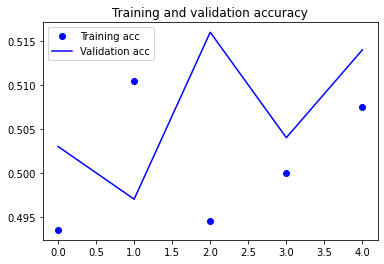

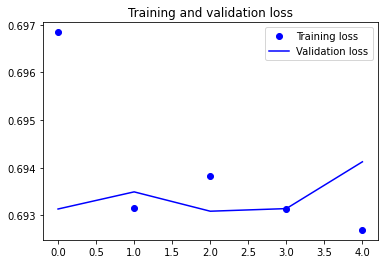

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 50%, while our validation accuracy stalls at 51%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

Due to lack of sufficent training samples(4000), overfitting is going to be our number one concern. We are aware of the number of techniques that can help resolve overfitting, such as dropout and weight decay (L2 regularization). We are now going to introduce a new one, specific to computer vision, and used almost universally when processing images with deep learning models: *data 
augmentation*.

## 5.4 Using data augmentation

Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. 
Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data 
augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number 
of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same 
picture twice. This helps the model get exposed to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by our `ImageDataGenerator` 
instance. Let's get started with an example:

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available. Let's quickly go over what we just wrote:



Let's take a look at our augmented images:

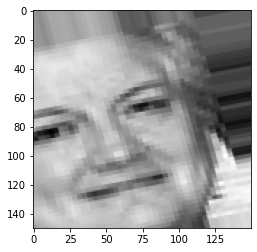

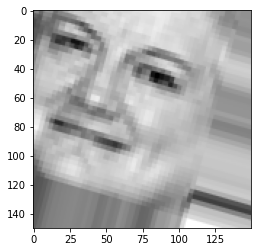

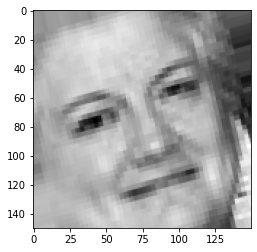

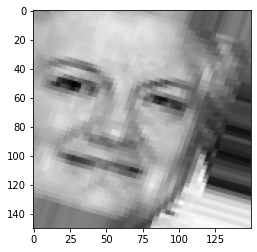

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
from google.colab import files

# We pick one image to "augment"
# this was defined above
img_path = train_dir + '/productive/1/100.jpg'

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs 
that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, 
we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting. To further fight 
overfitting, we will also add a Dropout layer to our model, right before the densely-connected classifier:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(216, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Let's train our network using data augmentation and dropout:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
# we simply scale it by the max value (255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, # 2000/50 = 100 (so we are grabbing 100 batches of size 32)
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50) # so we are grabbing 50 batches of size 32)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 67s 669ms/step - loss: 0.6960 - acc: 0.5041 - val_loss: 0.6932 - val_acc: 0.5019
Epoch 2/10
100/100 [==============================] - 32s 320ms/step - loss: 0.6927 - acc: 0.5059 - val_loss: 0.6931 - val_acc: 0.5038
Epoch 3/10
100/100 [==============================] - 24s 241ms/step - loss: 0.6936 - acc: 0.4978 - val_loss: 0.6932 - val_acc: 0.4919
Epoch 4/10
100/100 [==============================] - 23s 232ms/step - loss: 0.6927 - acc: 0.5041 - val_loss: 0.6932 - val_acc: 0.5019
Epoch 5/10
100/100 [==============================] - 24s 237ms/step - loss: 0.6932 - acc: 0.5078 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 6/10
100/100 [==============================] - 24s 236ms/step - loss: 0.6933 - acc: 0.4906 - val_loss: 0.6932 - val_acc: 0.5031
Epoch 7/10
100/100 [==============================] - 24s 237ms/step - loss: 0.6938 - acc: 0.4944 - val_lo

Let's save our model -- we will be using it in the section on convnet visualization.

In [ ]:
model.save('/content/drive/Shared drives/OPIM-5509-Introduction to Deep Learning/Project 2/data/New_data/NN_augmentation.h5') 

Let's plot our results again:

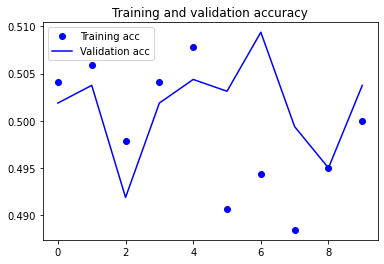

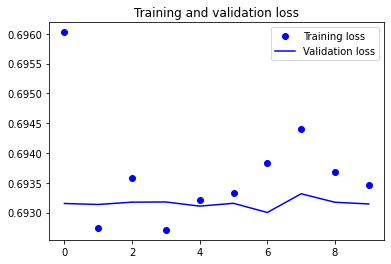

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are rather tracking the validation 
curves. We are now able to reach an accuracy of 51%, a 2% relative improvement over the non-regularized model.

By leveraging regularization techniques even further and by tuning the network's parameters (such as the number of filters per convolution 
layer, or the number of layers in the network), we may be able to get an even better accuracy, likely up to 70%. However, it would prove 
very difficult to go any higher just by training our own convnet from scratch, simply because we have so little data to work with. As a 
next step to improve our accuracy on this problem, we will have to leverage a pre-trained model, which will be the focus of the next two 
sections.

# **6. Pre-trained model: vgg16**

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # weights from imagenet - very important! otherwise it's just the network structure
                  include_top=False, # this means that our dense layer will be trained specific to our small data problem that we are solving
                  input_shape=(150, 150, 3)) # this is the shape of the data from our data generator (we know cats vs. dogs is 150 x 150)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
import numpy as np

from datetime import datetime
startTime = datetime.now()

# initialize your generator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) # this is given from the VGG16 architecture!
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 4000) # 2010?
print(datetime.now() - startTime)
validation_features, validation_labels = extract_features(validation_dir, 2000)
print(datetime.now() - startTime)
#test_features, test_labels = extract_features(test_dir, 2000)
#print(datetime.now() - startTime)

Found 4000 images belonging to 2 classes.
0:00:22.412008
Found 2000 images belonging to 2 classes.
0:00:33.006204


In [ ]:
# these are the X features for modeling
import numpy as np

train_features = np.reshape(train_features, (4000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (2000, 4 * 4 * 512))
#test_features = np.reshape(test_features, (2000, 4 * 4 * 512))

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


We fit our model to the data using the generator. We do it using the `fit_generator` method, the equivalent of `fit` for data generators 
like ours. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 
Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-sample large, so it will take $100$ batches until we see our target of 4000 samples.

When using `fit_generator`, one may pass a `validation_data` argument, much like with the `fit` method. Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.

### 6.1 Compiling the model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=2,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=2,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 - 4s - loss: 0.7115 - acc: 0.5300 - val_loss: 0.7568 - val_acc: 0.4700
Epoch 2/100
100/100 - 4s - loss: 0.7198 - acc: 0.4850 - val_loss: 0.6901 - val_acc: 0.5000
Epoch 3/100
100/100 - 4s - loss: 0.6997 - acc: 0.5450 - val_loss: 0.8340 - val_acc: 0.4200
Epoch 4/100
100/100 - 4s - loss: 0.7107 - acc: 0.5000 - val_loss: 0.6982 - val_acc: 0.4300
Epoch 5/100
100/100 - 4s - loss: 0.6969 - acc: 0.5350 - val_loss: 0.6926 - val_acc: 0.4900
Epoch 6/100
100/100 - 4s - loss: 0.6939 - acc: 0.5200 - val_loss: 0.6735 - val_acc: 0.5500
Epoch 7/100
100/100 - 4s - loss: 0.7022 - acc: 0.4900 - val_loss: 0.6655 - val_acc: 0.6300
Epoch 8/100
100/100 - 4s - loss: 0.7092 - acc: 0.4800 - val_loss: 0.7205 - val_acc: 0.4000
Epoch 9/100
100/100 - 4s - loss: 0.6911 - acc: 0.5200 - val_loss: 0.6888 - val_acc: 0.4800
Epoch 10/100
100/100 - 4s - loss: 0.7094 - acc: 0.4950 - val_loss: 0.6962 - val_acc: 0.4700
Epoch

## 6.2 Saving the model

In [ ]:
#model.save('/content/drive/Shared drives/OPIM-5509-Introduction to Deep Learning/Project 2/data/New_data/vgg16.h5') 

## 6.3 Evaluating the model

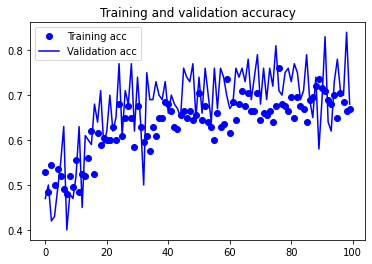

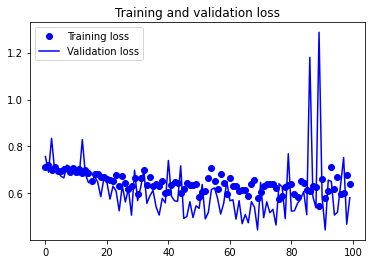

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Using VGG architecture, Our training accuracy increases linearly over time, until it reaches nearly 75%, while our validation accuracy at is 82%.   
Our validation loss reaches its minimum approximately 40%, while the training loss keeps decreasing linearly until 60%

## 6.4 Fine Tuning vgg16 model

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

### 6.4.1 Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 3s 28ms/step - loss: 0.5425 - acc: 0.7400 - val_loss: 0.4629 - val_acc: 0.7600
Epoch 2/100
100/100 [==============================] - 3s 27ms/step - loss: 0.5190 - acc: 0.7350 - val_loss: 0.5440 - val_acc: 0.7300
Epoch 3/100
100/100 [==============================] - 3s 27ms/step - loss: 0.5598 - acc: 0.7000 - val_loss: 0.5740 - val_acc: 0.7600
Epoch 4/100
100/100 [==============================] - 3s 26ms/step - loss: 0.5463 - acc: 0.7500 - val_loss: 0.5410 - val_acc: 0.7100
Epoch 5/100
100/100 [==============================] - 3s 27ms/step - loss: 0.5995 - acc: 0.6800 - val_loss: 0.5425 - val_acc: 0.7200
Epoch 6/100
100/100 [==============================] - 3s 27ms/step - loss: 0.5766 - acc: 0.7200 - val_loss: 0.4357 - val_acc: 0.8200
Epoch 7/100
100/100 [==============================] - 3s 27ms/step - loss: 0.5547 - acc: 0.6900 - val_loss: 0.6185 - val_acc: 0.7700
Epoch 8/100
100/100 [==============================] - 3s 27ms

###6.4.2 Saving the model

In [ ]:
model.save('/content/drive/Shared drives/OPIM-5509-Introduction to Deep Learning/Project 2/data/New_data/vgg16_finetune.h5') 

### 6.4.3 Evaluating the model

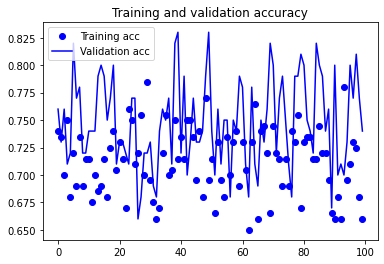

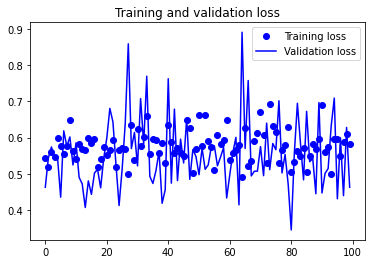

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



plt.show()

Using VGG architecture fine tuning , Our training accuracy increases linearly over time, until it reaches nearly 76%, while our validation accuracy at is 83 % after 6th epoch. Our validation loss reaches its minimum approximately 40%, while the training loss keeps decreasing linearly until 50%

# **7. Results and Discussion**



Please see our result and analysis:

1.   We have used 4000 train and 2000 validation images in our analysis. The images were collated together using different datasets and divided them into train and validation.

2.   The train and validation data are fed into 4 models CNN model, CNN model with image augmentation, vgg16 and fine-tuned vgg16 models to perform a binary classification of the data.

3.   Firstly we tried to build a baseline model using convolutional layer and dropouts (to alleviate overfitting) and train it using 5 epochs and using Adam optimizer. In the model we used (3x3) filter size of keras for convolution layer and (2x2) filter size for pooling layers in CNN model. Through this baseline model we were able to achieve 51% accuracy for validation dataset. To further increase the accuracy, we used image augmentation with same CNN model and 10 epochs, and were able to achieve 50.4% accuracy. 

4.   To further improve our results we made use of pre-trained models like vgg16 with 100 epochs for which the optimizer was RMS prop and were able to achieve 82% accuracy and min loss when compared to baseline model.

5. Further we tried to fine tune out vgg16 model by freezing the one block from its architecture and were able to achieve 83% accuracy.

Finally the following matrix clearly explains the result of our various model and our best model was VGG16 fine tuned with validation accuracy 83% after 6th Epoch and remains consistent throughout.




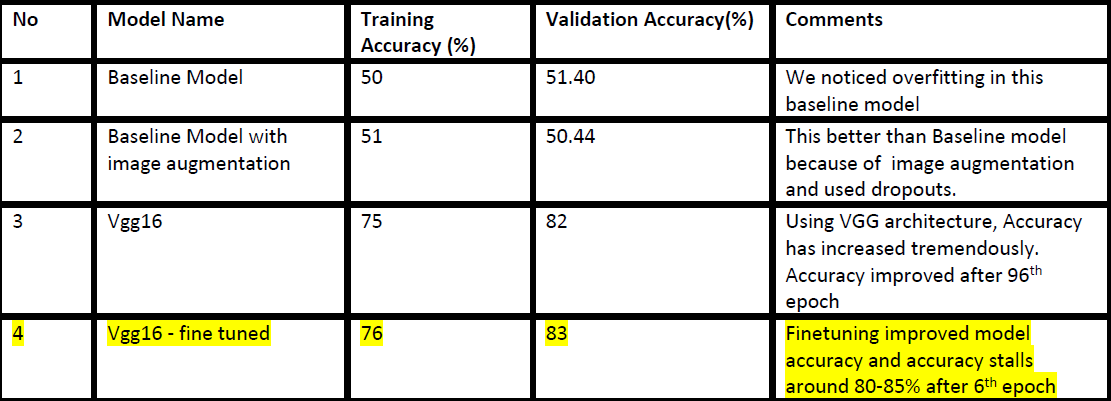

# **8. Conclusion**

In conclusion, the following stakeholders will benefit from our analysis and models:

**1.   Employer**

Human Resources with the help of certified and licensed counselors will greatly benefit from our model since it help them with preventative measures and assist with the creation of wellness programs.

**2.   Employees**

During COVID, a lot of employees are suffering from anxiety, depression and other mental health problems. Hence, this project was created and implement with empolyees as a main focus and we stongly believe that employees will be our primary clients.  

**3.   HealthCare professionals**

Due to ADA and labor act, healthcare professionals have to be very careful with mental health issues. Our model will provide an excellent starting point for discussion and in providing the appropriate wellness programs.  

**4.   Pharma**

Pharmaceutical companies might not benefit from our model since the main goal of our model is to engage counselor for wellness program. Hence, the dependence on prescription drugs will be reduced via our model.    

**5.   Insurance**

Most insurance companies will greatly benefit from our models since it will a great cost savings model that will minimize cost by cutting insurance coverage for mental health.


# **9. Reference**

1.  [Wanliang Tan, Jiahui Wang, Yu Wang,William Jarrold,"CNN Models for Classifying Emotions Evoked by Paintings"](https://web.stanford.edu/~yuwangme/project_doc/CS231N_Report.pdf) 
2.  [ Zeynep Hilal Kilimci , Aykut Güven, Mitat Uysal, and Selim Akyokus,"Mood Detection from Physical and Neurophysical Data Using Deep Learning Models"](https://www.hindawi.com/journals/complexity/2019/6434578/)
3.   [US Equal employment Opputunity Commission,Law:"Remedies For Employment Discrimination"](https://www.eeoc.gov/remedies-employment-discrimination)
4.   [ADA.gov,Law:"Movie Captioning and Audio Description Final Rule"](https://www.ada.gov/regs2016/movie_captioning_rule_page.html)
5.   [Rohit Dwivedi,Blog:"My first CNN project – Emotion Detection Using Convolutional Neural Network With TPU "](https://analyticsindiamag.com/my-first-cnn-project-emotion-detection-using-convolutional-neural-network-with-tpu/)
6.  [Md. Rezaul Karim,Book:"Predictive Analytics with TensorFlow"](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788398923/8/ch08lvl1sec62/cnn-model-for-emotion-recognition)

7. [CNBC NEWS,"U.S. productivity rises a record 10.1% in the second quarter"](https://www.cnbc.com/2020/09/03/us-productivity-rises-a-record-10point1percent-in-the-second-quarter.html)

8.  [Martin Neil Baily, Barry P. Bosworth , Siddhi Doshi,"International Productivity Monitor"](http://www.csls.ca/ipm.asp)

9. [Xiaofan Lin,Cong Zhao,Wei Pan,"Towards Accurate Binary Convolutional Neural Network"](http://papers.nips.cc/paper/6638-towards-accurate-binary-convolutional-neural-network)

10. [Mohammad Rastegari,Vicente Ordonez,Joseph Redmon,Ali Farhadi,"XNOR-Net: ImageNet Classification Using Binary Convolutional Neural Networks"](https://link.springer.com/chapter/10.1007/978-3-319-46493-0_32)

11. [Lianzhi Tan,Kaipeng Zhang,Kai Wang,Xiaoxing Zeng,Xiaojiang Peng,Yu Qiao,"Group emotion recognition with individual facial emotion CNNs and global image based CNNs"](https://dl.acm.org/doi/abs/10.1145/3136755.3143008)


12. [Bhakti Sonawane,Priyanka Sharma,"Acceleration of CNN-Based Facial Emotion Detection Using NVIDIA GPU"](https://link.springer.com/chapter/10.1007/978-981-10-7245-1_26)



